In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Cs\MLT\Datasource\Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.drop(['ID'],inplace=True,axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [6]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

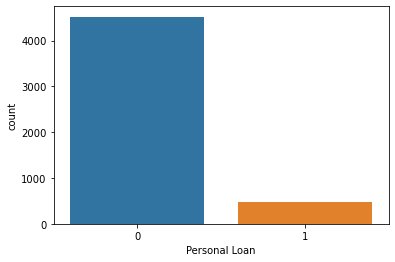

In [7]:
sns.countplot(x='Personal Loan',data=df)

In [8]:
df['Age'] = pd.cut(df['Age'],bins=[23,30,45,67],labels=['Young','Adult','Old'])

In [9]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,Young,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,Adult,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,Adult,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,Adult,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,Adult,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
df['Age'].value_counts()

Old      2481
Adult    1895
Young     612
Name: Age, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])

In [12]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [13]:
col = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 
       'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard', 'Personal Loan']
df = df[col]

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

keras = Sequential()
keras.add(Dense(12,input_dim=12,activation='relu'))
keras.add(Dense(8,activation='relu'))
keras.add(Dense(6,activation='relu'))

In [17]:
keras.add(Dense(1,activation='sigmoid'))

In [18]:
keras.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
keras.fit(x_train,y_train,epochs=20,batch_size=25)

Epoch 1/20
150/150 [==============================] - 2s 2ms/step - loss: 14.9186 - accuracy: 0.8365
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 4.3132 - accuracy: 0.8408
Epoch 3/20
150/150 [==============================] - 1s 3ms/step - loss: 3.3585 - accuracy: 0.8365
Epoch 4/20
150/150 [==============================] - 1s 4ms/step - loss: 3.3108 - accuracy: 0.8536
Epoch 5/20
150/150 [==============================] - 0s 3ms/step - loss: 2.3802 - accuracy: 0.8683
Epoch 6/20
150/150 [==============================] - 0s 3ms/step - loss: 2.1479 - accuracy: 0.8691
Epoch 7/20
150/150 [==============================] - 1s 3ms/step - loss: 1.8004 - accuracy: 0.8779
Epoch 8/20
150/150 [==============================] - 0s 2ms/step - loss: 2.9711 - accuracy: 0.8659
Epoch 9/20
150/150 [==============================] - 0s 2ms/step - loss: 2.7417 - accuracy: 0.8728
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss: 2.4952 - accuracy: 0.860

In [20]:
_,acc = keras.evaluate(x_train,y_train)
print(acc*100)

118/118 [==============================] - 1s 3ms/step - loss: 0.9049 - accuracy: 0.9112
91.11999869346619


In [21]:
y_pred = keras.predict(x_test)
y_pred = (y_pred>0.5)

40/40 [==============================] - 0s 1ms/step


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8872

In [23]:
from keras import backend as K
def r_loss(y_test,y_pred):
    res=K.sum(K.square(y_test-y_pred))    
    total=K.sum(K.square(y_test-K.mean(y_test)))
    return 1-(1-res/(total+K.epsilon()))

## Genetic Algorithm

In [24]:
from keras.layers import LSTM, Dropout, Dense, TimeDistributed, Activation
ga = Sequential()
ga.add(LSTM(32,return_sequences=False, input_shape=(None,1),name='1'))

In [25]:
def rmse(y_test,y_pred):
    return np.sqrt(np.square(y_pred-y_test),axis=1)

In [27]:
ga.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mean_squared_error',r_loss])

In [28]:
def Fitness(par):
    l1=ga.get_layer('1').get_weights()
    l2=ga.get_layer('2').get_weights()
    l1_w1_shape=(l1[0].shape[0]*l1[0].shape[1])
    l1_w2_shape=l1_w1_shape+(l1[1].shape[0]*l1[1].shape[1])
    l1_B_shape=l1_w2_shape+(l1[2].shape[0])
    l2_w_shape=l1_B_shape+(l2[0].shape[0]*l2[0].shape[1])
    l2_B_shape=l2_w_shape+(l2[1].shape[0])
    l1_w1=par[0:l1_w1_shape].reshape(l1[0].shape)
    l1_w2=par[0:l1_w1_shape:l1_w2_shape].reshape(l1[1].shape)
    l1_B=par[l1_w2_shape:l1_B_shape].reshape(l1[2].shape)
    l2_w=par[l1_B_shape:l2_w_shape].reshape(l2[0].shape)
    L2_B=par[l2_w_shape:l2_B_shape].reshape(l2[1].shape)
    
    ga.get_layer('1').set_weights([l1_w1,l1_w2,l1_B])
    ga.get_layer('2').set_weights([l2_w,l2_B])
    
    pred=ga.predict(x_train)
    loss=rmse(y_train.reshape(y_train.shape[0]),y_pred.reshape(y_train.shape[0]))
    return loss

In [29]:
def fun(par):
    print('no of particles ',par.shape[0])
    loss1=np.array([Fitness(par[i]) for i in range(par.shape[0])])
    return loss1

In [30]:
predY=ga.predict(x_test)

40/40 [==============================] - 1s 3ms/step


In [31]:
loss_GA=ga.evaluate(x_test,y_test)

40/40 [==============================] - 1s 3ms/step - loss: 0.1483 - mean_squared_error: 0.1483 - r_loss: 6828435.0000


In [32]:
loss_GA

[0.14827178418636322, 0.14827178418636322, 6828435.0]

In [33]:
loss_GA[0]

0.14827178418636322

In [34]:
 lossNN=keras.evaluate(x_test,y_test)

40/40 [==============================] - 0s 2ms/step - loss: 1.1078 - accuracy: 0.8872


In [ ]:
from tensorflow.keras.optimizers import Adam
num_generations = 10
population_size = 10
mutation_rate = 0.1
crossover_rate = 0.8
num_parents = 5
num_elites = 1
num_population =20

In [ ]:
num_input = x_train.shape[1]
num_output = len(np.unique(y_train))
num_hidden_layers = 2
num_neurons = 16
activation = 'relu'

In [ ]:
def create_model(num_input, num_output, num_hidden_layers, num_neurons, activation):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=num_input, activation=activation))
    for i in range(num_hidden_layers-1):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(num_output, activation='softmax'))
    optimizer = Adam(lr=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    return model

def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

In [ ]:
def fitness_function(individual, X_train, y_train, X_test, y_test):
    num_input = X_train.shape[1]
    num_output = len(np.unique(y_train))
    num_hidden_layers = individual[0]
    num_neurons = individual[1]
    activation = individual[2]
    model = create_model(num_input, num_output, num_hidden_layers, num_neurons, activation)
    model = train_model(model, X_train, y_train)
    accuracy = evaluate_model(model, X_test, y_test)
    return accuracy

In [ ]:
def initialize_population(num_population, num_hidden_layers, num_neurons, activation):
    population = []
    for i in range(num_population):
        individual = [num_hidden_layers, num_neurons, activation]
        population.append(individual)
    return population

population = initialize_population(population_size, num_hidden_layers, num_neurons, activation)

In [ ]:
for generation in range(num_generations):
    fitness_scores = []
    for individual in population:
        fitness_scores.append(fitness_function(individual, x_train, y_train, x_test, y_test))
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    elites = sorted_population[:num_elites]
    parents = sorted_population[:num_parents]
    for individual in parents:
        population.remove(individual)
    offspring = []
    for i in range(num_population - num_elites):
        parent1 = np.random.choice(parents)
        parent2 = np.random.choice(parents)
        offspring1 = parent1.copy()
        offspring2 = parent2.copy()
        for j in range(len(parent1)):
            if np.random.uniform() < crossover_rate:
                offspring1[j] = parent2[j]
                offspring2[j] = parent1[j]
        for j in range(len(parent1)):
            if np.random.uniform() < mutation_rate:
                if j == 0:
                    offspring1[j] = np.random.randint(1, 4)
                    offspring2[j] = np.random.randint(1, 4)
                elif j == 1:
                    offspring1[j] = np.random.randint(2, 32)
                    offspring2[j] = np.random.randint(2, 32)
                else:
                    offspring1[j] = np.random.choice(['relu', 'sigmoid'])
                    offspring2[j] = np.random.choice(['relu', 'sigmoid'])
        offspring.append(offspring1)
        offspring.append(offspring2)
    population = elites + offspring

In [ ]:
best_individual = [sorted_population[0]]
hidden_layers = []
for i in range(best_individual[0]):
    hidden_layers.append(best_individual[i+1])
activation_functions = []
for i in range(best_individual[0]+1, len(best_individual)):
    activation_functions.append(best_individual[i])
    
model = create_model(hidden_layers, activation_functions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test), batch_size=batch_size, verbose=0)

In [35]:
test_loss, test_accuracy = keras.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy*100)

40/40 [==============================] - 0s 2ms/step - loss: 1.1078 - accuracy: 0.8872
Test loss: 1.107804536819458
Test accuracy: 88.71999979019165
